In [4]:
# data import

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
suministrosindustriales=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\suministrosindustriales.csv')

In [7]:
suministrosindustriales.head()

,N°,Zona,Un.lect.,Contrato,Tp.tarifa,Instalacion,Fact.cálculo,Equipo,Número de serie,Fabricante,...,09/01/2022,10/01/2022,11/01/2022,Prioridad,Promedio,% Variacion,Tendencia,Grafico,Ordenes,Observacion
0,1131,ST,ST_78_03,504832401.0,G_GMH,30323809.0,160.0,1.000000e+11,115316.0,SIEMENS,...,30032.0,21680.0,21680.0,Media,"16,481",101.38%,-,NaN,NaN,NaN
1,947,ST,ST_78_14,207043801.0,G_GMH,30104871.0,60.0,1.000000e+11,202.0,SCHLUMBERGER,...,0.0,0.0,0.0,Baja,"5,245",199.64%,-,NaN,NaN,NaN
2,1167,ST,ST_78_13,515750101.0,G_GMH,30369130.0,160.0,1.000000e+11,182971.0,LANDIS + GYR,...,1536.0,336.0,336.0,Media,"20,403",82.15%,-,NaN,NaN,NaN
3,602,SS,SS_07_06,101263601.0,G_GMH,30035303.0,120.0,1.000000e+11,479287.0,SIEMENS,...,6408.0,5904.0,5904.0,Baja,"4,346",42.12%,-,NaN,NaN,NaN
4,484,SS,SS_78_11,502594901.0,G_GMH,30206065.0,120.0,1.000000e+11,106418.0,SIEMENS,...,46644.0,44280.0,44280.0,Alta,"51,534",13.82%,-,NaN,NaN,NaN


In [8]:
suministrosindustriales.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [9]:
suministrosindustriales.shape

(1698, 72)

In [10]:
suministrosindustriales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N°                 1698 non-null   object 
 1   Zona               1697 non-null   object 
 2   Un.lect.           1697 non-null   object 
 3   Contrato           1697 non-null   float64
 4   Tp.tarifa          1697 non-null   object 
 5   Instalacion        1697 non-null   float64
 6   Fact.cálculo       1697 non-null   float64
 7   Equipo             1697 non-null   float64
 8   Número de serie    1697 non-null   float64
 9   Fabricante         1697 non-null   object 
 10  Denomin.tipo       1697 non-null   object 
 11  DS                 1681 non-null   object 
 12  ¿Telesgestionada?  1697 non-null   object 
 13  Tipo de medicion   1697 non-null   object 
 14  Lista              1697 non-null   object 
 15  Municipio          1697 non-null   object 
 16  Población          1697 

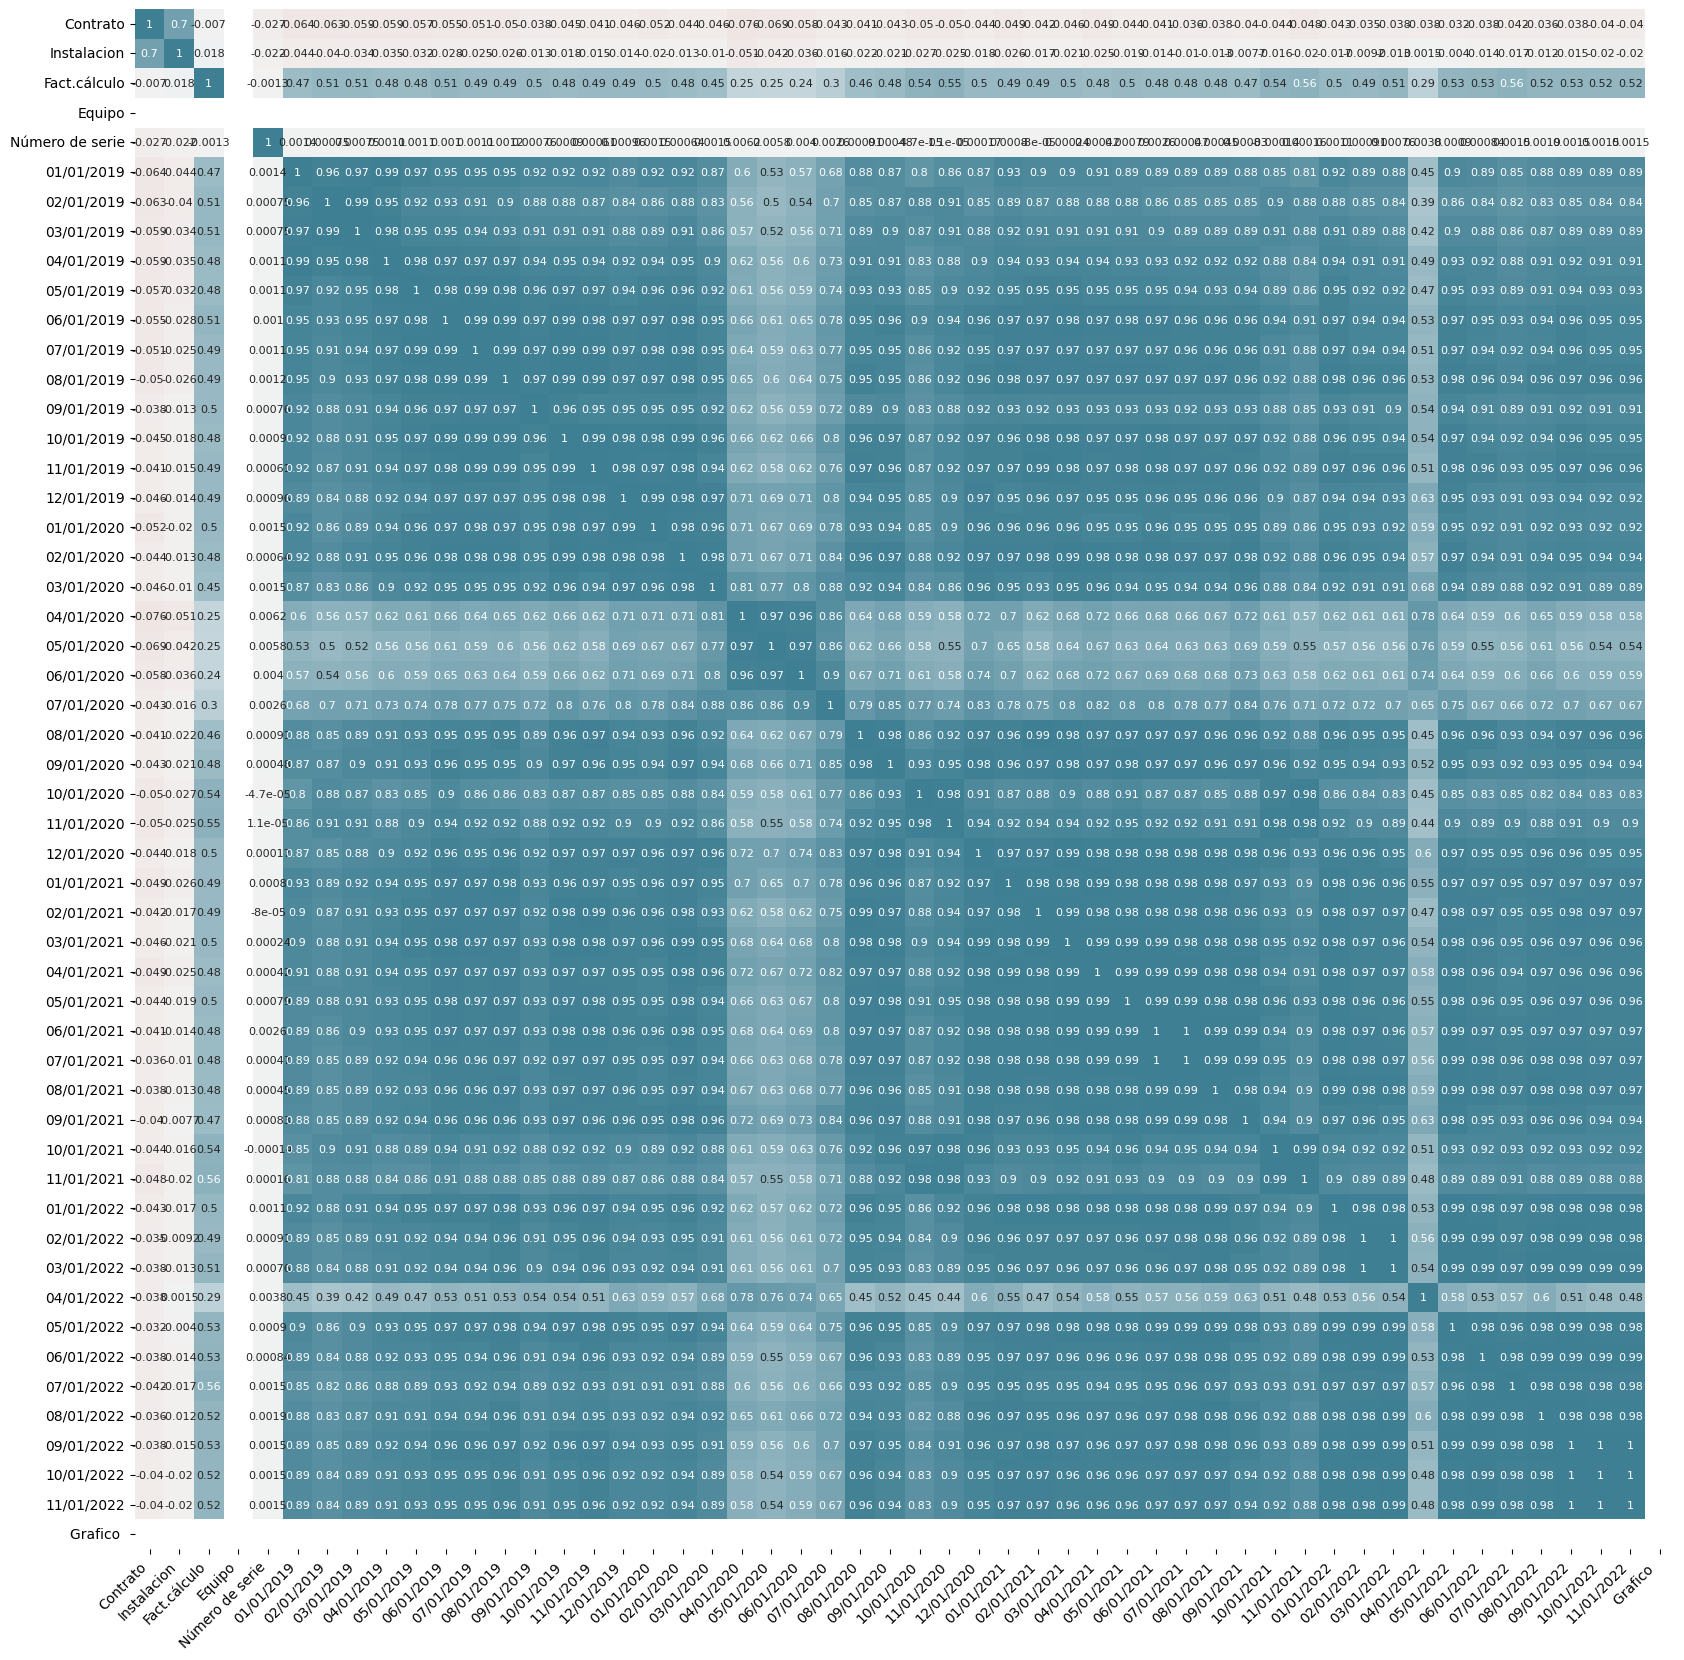

In [11]:
# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =suministrosindustriales.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


In [12]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = suministrosindustriales.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

,variable_1,variable_2,r,abs_r
2498,11/01/2022,10/01/2022,1.000000,1.000000
2449,10/01/2022,11/01/2022,1.000000,1.000000
2041,02/01/2022,03/01/2022,0.996219,0.996219
2090,03/01/2022,02/01/2022,0.996219,0.996219
2497,11/01/2022,09/01/2022,0.995733,0.995733
...,...,...,...,...
1430,01/01/2021,03/01/2021,0.983033,0.983033
1524,03/01/2021,09/01/2020,0.982919,0.982919
1230,09/01/2020,03/01/2021,0.982919,0.982919
2196,05/01/2022,08/01/2022,0.982895,0.982895


In [13]:
suministrosindustriales.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N°,1698,1698,1131,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zona,1697,8,ST,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Un.lect.,1697,321,ST_78_03,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contrato,1697.0,NaN,NaN,NaN,426838188.823807,194853970.758459,100493801.0,207054501.0,506734701.0,517189701.0,901112200.0
Tp.tarifa,1697,13,G_GMH,850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
% Variacion,1697,1397,0.00%,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tendencia,1697,1,-,1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grafico,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Ordenes,1,1,"falla,",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px


In [14]:
suministrosindustriales.isnull().sum()

N°                0
Zona              1
Un.lect.          1
Contrato          1
Tp.tarifa         1
               ... 
% Variacion       1
Tendencia         1
Grafico        1697
Ordenes        1697
Observacion    1688
Length: 72, dtype: int64

In [15]:
suministrosindustriales.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [16]:
suministrosindustriales.isnull().sum()

N°                0
Zona              1
Un.lect.          1
Contrato          1
Tp.tarifa         1
               ... 
% Variacion       1
Tendencia         1
Grafico        1697
Ordenes        1697
Observacion    1688
Length: 72, dtype: int64

In [18]:
clean=suministrosindustriales.dropna(subset=['02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022'])

In [19]:
from sklearn.ensemble import IsolationForest

In [30]:
from sklearn.model_selection import train_test_split

In [27]:
X=clean[['02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022']]

In [32]:

X_train, X_test =\
       train_test_split(X, 
                        test_size=0.2, 
                        random_state=1,
                        )

In [59]:
clf = IsolationForest(random_state=0).fit(X_train)

In [60]:
clf.predict(X_test)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [61]:
Y=[]

In [37]:
Y_pred=clf.predict(X_test)

In [40]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [62]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [63]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


def compute_prediction(X, model_name):

    print(f"Computing {model_name} prediction...")
    if model_name == "LOF":
        clf = LocalOutlierFactor(n_neighbors=26, contamination="auto")
        clf.fit(X)
        y_pred = clf.negative_outlier_factor_
    if model_name == "IForest":
        clf = IsolationForest(random_state=rng, contamination="auto")
        y_pred = clf.fit(X).decision_function(X)
    return y_pred


In [54]:
if_y_pred=clf.predict(X_test)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0


In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0) ##Forest of 10 trees

In [67]:
if_y_pred=clf.predict(X_test,)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [70]:
roc_auc_score(X_test, if_y_pred_class)

ValueError: multiclass-multioutput format is not supported